# スターポリゴンのサイズを調整して、自由点を座標原点に持ってくる(正規化)

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import math
# setting learning schedul
from torch.optim.lr_scheduler import LambdaLR
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from torch_geometric.nn import GCNConv

polygon: <__main__.Data object at 0x7f8ace8a7ca0>


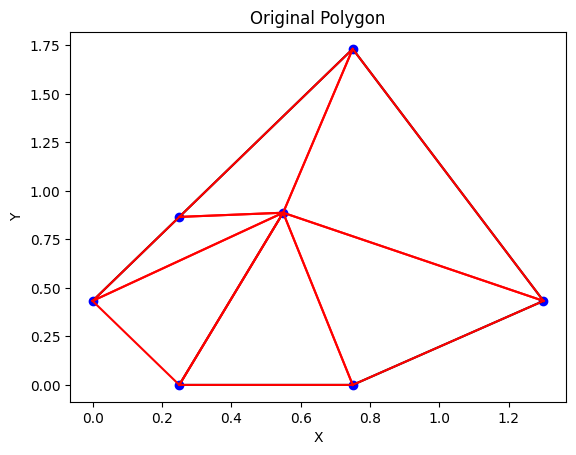

In [77]:
class Data:
    def __init__(self, vertices, faces):
        self.vertices = vertices
        self.faces = faces

def create_data():
    random_number_x = random.random()
    random_number_y = random.random()
    root_3 = torch.sqrt(torch.tensor(3.))
    vertices = torch.tensor([[random_number_x, random_number_y], [0.25, 0], [0.75, 0], [1.3, 0.25*root_3], [0.75, 1*root_3], [0.25, 0.5*root_3], [0, 0.25*root_3]], dtype=torch.float64)
    faces = torch.tensor([[1, 2, 0], [2, 3, 0], [3, 4, 0], [4, 5, 0], [5, 6, 0], [6, 1, 0]])

    polygon = Data(vertices, faces)
    # print(polygon)
    return polygon

def plot_mesh(vertices, faces, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # 描画するメッシュの頂点をプロット
    ax.plot(vertices[:,0], vertices[:,1], 'bo')  # 頂点を青色の点でプロット
    ax.plot(vertices[:,0], vertices[:,1], 'k-')  # 辺を黒色の線でプロット

    # 各三角形をプロット
    for face in faces:
        v0, v1, v2 = vertices[face]
        ax.plot([v0[0], v1[0], v2[0], v0[0]], [v0[1], v1[1], v2[1], v0[1]], 'r-')  # 三角形を赤色の線でプロット

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.show()

polygon = create_data()
print("polygon:", polygon)
# オリジナルのメッシュをプロット
plot_mesh(polygon.vertices, polygon.faces, title="Original Polygon")

In [73]:
d = torch.max(torch.max(polygon.vertices[:,0])-torch.min(polygon.vertices[:,0]), torch.max(polygon.vertices[:,1])-torch.min(polygon.vertices[:,1]))
print("d:", d)

d: tensor(1.7321, dtype=torch.float64)


In [ ]:
print(polygon.vertices)
print(polygon.vertices[:,0])
print(polygon.vertices[:,1])

In [ ]:
for i in range(len(polygon.vertices[:,0])):
    polygon.vertices[i-1,0] = (polygon.vertices[i-1,0]-torch.min(polygon.vertices[:,0])) / d
    polygon.vertices[i-1,1] = (polygon.vertices[i-1,1]-torch.min(polygon.vertices[:,1])) / d
print("After Norm:", polygon.vertices)
print(polygon.vertices[0,0], polygon.vertices[0,1])
plot_mesh(polygon.vertices, polygon.faces, title="After Norm")

In [ ]:
Cx = polygon.vertices[0,0].item()
Cy = polygon.vertices[0,1].item()

for i in range(len(polygon.vertices[:,0])):
    polygon.vertices[i-1,0] = polygon.vertices[i-1,0]-Cx
    polygon.vertices[i-1,1] = polygon.vertices[i-1,1]-Cy

print("After Norm:", polygon.vertices)
print("Cx,Cy:", polygon.vertices[0])


plot_mesh(polygon.vertices, polygon.faces, title="After Norm")

In [79]:
def normalization(vertices):
    d = torch.max(torch.max(vertices[:,0])-torch.min(vertices[:,0]), torch.max(vertices[:,1])-torch.min(vertices[:,1]))
    for i in range(len(vertices[:,0])):
        vertices[i-1,0] = (vertices[i-1,0]-torch.min(vertices[:,0])) / d
        vertices[i-1,1] = (vertices[i-1,1]-torch.min(vertices[:,1])) / d
    
    Cx = vertices[0,0].item()
    Cy = vertices[0,1].item()   

    for i in range(len(vertices[:,0])):
        vertices[i-1,0] = vertices[i-1,0]-Cx
        vertices[i-1,1] = vertices[i-1,1]-Cy

    return vertices


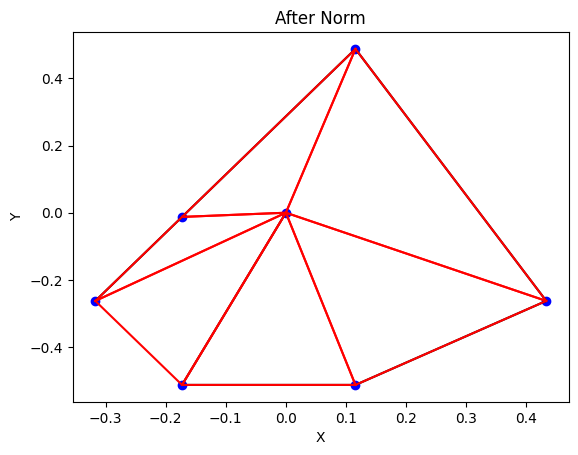

In [80]:
polygon.vertices = normalization(polygon.vertices)
plot_mesh(polygon.vertices, polygon.faces, title="After Norm")